In [13]:
import torch
import os
import train as tr
import network as nw
import utils
import numpy as np
import tqdm
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

In [14]:
# GET DEVICE AND CHECK.
gpu_flag = torch.cuda.is_available()
device = torch.device("cuda" if gpu_flag else "cpu")
print("GPU INFO : ", torch.cuda.get_device_name(device))

GPU INFO :  GeForce GTX 1060 6GB


In [15]:
DATASET_DIR = 'D:/dataset_car/kcar_preprocessed/kcar'
BATCH_SIZE = 16

d_total = utils.get_dataset(DATASET_DIR)

BEST_EPOCH_RESNET = 43
BEST_EPOCH_MODEL1 = 49
BEST_EPOCH_MODEL2 = 47

In [16]:
model = nw.ResNet18(in_channels=3, labelNum=100)
model.load_state_dict(torch.load(f'./result/resnet-2/_{BEST_EPOCH_RESNET}.pt'))
test_index_arr = np.load('./result/resnet-2/idx_test.npy')
test_dataset = Subset(d_total, indices=test_index_arr)

f1_score_resnet = tr.prediction_with_fscore(
    dataset=test_dataset,
    model=model,
    device=device,
    batch_size=BATCH_SIZE
)
np.save('./result/resnet-2/f1_score.npy', f1_score_resnet)




model = nw.Model_1(in_channels=3, labelNum=100)
model.load_state_dict(torch.load(f'./result/model_1-2/_{BEST_EPOCH_MODEL1}.pt'))
test_index_arr = np.load('./result/model_1-2/idx_test.npy')
test_dataset = Subset(d_total, indices=test_index_arr)
f1_score_m1 = tr.prediction_with_fscore(
    dataset=test_dataset,
    model=model,
    device=device,
    batch_size=BATCH_SIZE
)
np.save('./result/model_1-2/f1_score.npy', f1_score_m1)




model = nw.Model_2(in_channels=3, labelNum=100)
model.load_state_dict(torch.load(f'./result/model_2-2/_{BEST_EPOCH_MODEL2}.pt'))
test_index_arr = np.load('./result/model_2-2/idx_test.npy')
test_dataset = Subset(d_total, indices=test_index_arr)
f1_score_m2 = tr.prediction_with_fscore(
    dataset=test_dataset,
    model=model,
    device=device,
    batch_size=BATCH_SIZE
)
np.save('./result/model_2-2/f1_score.npy', f1_score_m2)

100%|██████████| 787/787 [02:12<00:00,  5.94it/s]


LABEL ARR GENERATE.


100%|██████████| 787/787 [00:00<00:00, 78696.32it/s]


PRED ARR GENERATE.


100%|██████████| 787/787 [00:00<00:00, 98414.40it/s]


number of points:  12580


100%|██████████| 787/787 [01:49<00:00,  7.19it/s]


LABEL ARR GENERATE.


100%|██████████| 787/787 [00:00<00:00, 87457.73it/s]


PRED ARR GENERATE.


100%|██████████| 787/787 [00:00<00:00, 87425.31it/s]


number of points:  12580


100%|██████████| 787/787 [01:36<00:00,  8.18it/s]


LABEL ARR GENERATE.


100%|██████████| 787/787 [00:00<00:00, 87455.42it/s]


PRED ARR GENERATE.


100%|██████████| 787/787 [00:00<00:00, 22487.04it/s]

number of points:  12580


(100,)
(100,)
(100,)


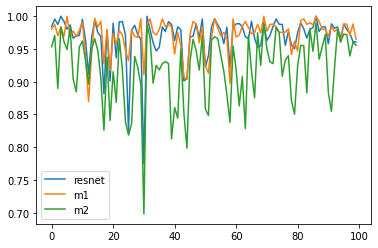

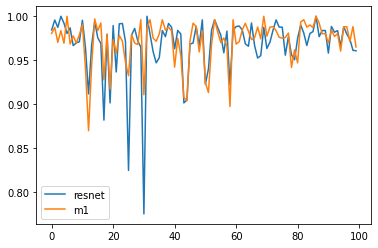

In [21]:
x_axis = [i for i in range(f1_score_m1.shape[0])]
print(f1_score_resnet.shape)
print(f1_score_m1.shape)
print(f1_score_m2.shape)

plt.plot(x_axis, f1_score_resnet, label='resnet')
plt.plot(x_axis, f1_score_m1, label='m1')
plt.plot(x_axis, f1_score_m2, label='m2')
plt.legend()
plt.show()


plt.plot(x_axis, f1_score_resnet, label='resnet')
plt.plot(x_axis, f1_score_m1, label='m1')
plt.legend()
plt.show()

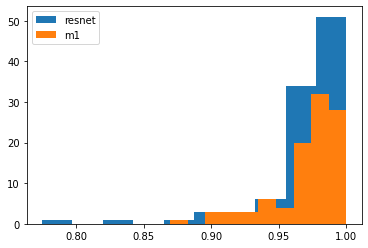

In [23]:
plt.hist(f1_score_resnet, label='resnet')
plt.hist(f1_score_m1, label='m1')
plt.legend()
plt.show()

In [20]:
print(np.var(f1_score_m1))
print(np.var(f1_score_resnet))

0.0006115882427059058
0.0011087450829241298
